# Linear Regression Model

## Table of Content

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)<br>
3. [Linear Regression using Python Scikit Learn](#section301)<br>
    - 3.1 [Preparing data (X and y) for Linear Regression using Pandas](#section301)<br>
    - 3.2 [Splitting X and y into training and test datasets](#section302)<br>
    - 3.3 [Linear regression in scikit-learn](#section303)<br>
    - 3.4 [Interpreting Model Coefficients](#section304)<br>
    - 3.5 [Using the Model for Prediction](#section305)<br>
4. [Model evaluation](#section4)<br>
    - 4.1 [Model evaluation using metrics](#section401)<br>
    - 4.2 [Model Evaluation using Rsquared value.](#section402)<br>

<a id=section1></a>
## 1. Problem Statement

To predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

<a id=section2></a>

## 2. Data Loading and Description

The dataset has 2 columns:
    - Hours: Number of study hours
    - Score: Marks scored
There are a total of 25 rows (observations)

### Importing Packages

In [19]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [20]:
# reading the student dataset

df_std = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

In [21]:
# understanding the dataset

df_std.info()
df_std.describe()
df_std.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


Let us plot the data points on a 2-D graph and see if we can manually find any relationship between the data. We can create the plot with the following script:

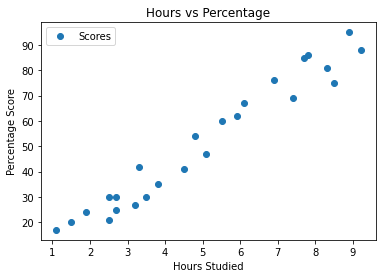

In [22]:
# Plotting the distribution of scores
df_std.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

<a id=section3></a>

## 3. Linear Regression using Python Scikit Learn

<a id=section301></a>

### 3.1 Preparing data (X and y) for Linear Regression using Pandas

- __Standardization__. <br/>
Standardize features by removing the _mean_ and scaling to _unit standard deviation_.

In [23]:
from sklearn.preprocessing import StandardScaler
ss= StandardScaler().fit(df_std)
df_std= ss.transform(df_std)
type(df_std)

numpy.ndarray

In [24]:
df_std = pd.DataFrame(df_std)       #StandardScaler Transform fxn gives an Array as output. Converting the array to a Dataframe
df_std.head()

,0,1
0,-1.015328,-1.230223
1,0.035569,-0.180820
2,-0.732394,-0.988053
3,1.409819,0.949306
4,-0.611137,-0.866968


In [25]:
df_std.columns = ['Hours','Scores']   #Adding column names to the Dataframe 
df_std.head()

,Hours,Scores
0,-1.015328,-1.230223
1,0.035569,-0.180820
2,-0.732394,-0.988053
3,1.409819,0.949306
4,-0.611137,-0.866968


The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).
 - X = Input will be column 'Hours'  
 - y = Output will be column 'Scores'

In [29]:
X = df_std.iloc[:, :-1].values  
y = df_std.iloc[:, 1].values  
type(X)
print(type(y))

<class 'numpy.ndarray'>


<a id=section302></a>

### 3.2 Splitting X and y into training and test datasets.

In [30]:
from sklearn.model_selection import train_test_split

def split(X,y):
    return train_test_split(X, y, test_size=0.15, random_state=1)

In [31]:
X_train, X_test, y_train, y_test=split(X,y)
print('Train cases as below')
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

Train cases as below
X_train shape:  (21, 1)
y_train shape:  (21,)

Test cases as below
X_test shape:  (4, 1)
y_test shape:  (4,)


<a id=section303></a>

### 3.3 Linear regression in scikit-learn

In [32]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()

lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

<a id=section304></a>

### 3.4 Interpreting Model Coefficients

In [33]:
print('Intercept:',lr.intercept_)                                            
print('Coefficients:',lr.coef_)


Intercept: -0.013193057023790561
Coefficients: [1.04242402]


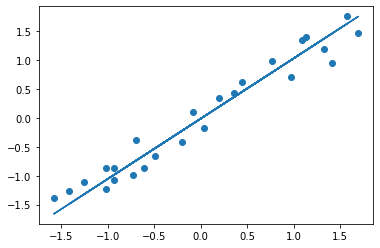

In [34]:
# Plotting the regression line
line = lr.coef_*X+lr.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [35]:
y_pred_train = lr.predict(X_train)  
y_pred_test = lr.predict(X_test)                                                    

<a id=section305></a>

### 3.5 Using the Model for Prediction

In [36]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})  
df 

,Actual,Predicted
0,-1.391670,-1.661470
1,-0.382629,-0.734525
2,-1.109138,-1.324399
3,0.949306,1.456436


<a id=section4></a>
## 4. Model evaluation 


__Error__ is the _deviation_ of the values _predicted_ by the model with the _true_ values.<br/>
For example, if a model predicts that for 'x' no. of studying hours the student will score 60 marks, but the actually the student scores just 45 marks, then the error in prediction will be 15 marks.<br/>
Below are the types of error we will be calculating for our _linear regression model_:
- Mean Absolute Error
- Mean Squared Error
- Root Mean Squared Error

<a id=section401></a>
### 4.1 Model Evaluation using __metrics.__

__Mean Absolute Error__ (MAE) is the mean of the absolute value of the errors:
$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

__Evaluating the model using MAE for both train and test__

In [39]:
from sklearn import metrics 

MAE_train = metrics.mean_absolute_error(y_train, y_pred_train)
MAE_test = metrics.mean_absolute_error(y_test, y_pred_test)
print('Mean Absolute Error for training set is {}'.format(MAE_train))
print('Mean Absolute Error for test set is {}'.format(MAE_test))

Mean Absolute Error for training set is 0.1859189338893028
Mean Absolute Error for test set is 0.33602146215652806


__Mean Squared Error__ (MSE) is the mean of the squared errors:
$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

__Evaluating the model using MSE for both train and test__

In [40]:
MSE_train = metrics.mean_squared_error(y_train, y_pred_train)
MSE_test = metrics.mean_squared_error(y_test, y_pred_test)
print('MSE for training set is {}'.format(MSE_train))
print('MSE for test set is {}'.format(MSE_test))

MSE for training set is 0.0376275074591598
MSE for test set is 0.1250350785194622


__Root Mean Squared Error__ (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

__Evaluating the model using RMSE for both train and test__

In [41]:
from sklearn import metrics

RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
print('RMSE for training set is:',RMSE_train)
print('RMSE for test set is:',RMSE_test) 

RMSE for training set is: 0.19397811077325142
RMSE for test set is: 0.3536029956313467


Comparing these metrics:

- __MAE__ is the easiest to understand, because it's the __average error.__ 
- __MSE__ is more popular than MAE, because MSE "punishes" larger errors.
- Lower the MAE & MSE value, the higher the accuracy of prediction as there would be excellent match between the actual and predicted data set. 
- __RMSE__ is even more popular than MSE, because RMSE is _interpretable_ in the "y" units.
    - Easier to put in context as it's the same units as our response variable.
    - RMSE values between 0.2 and 0.5 shows that the model can relatively predict the data accurately. 

<a id=section402></a>
### 4.2 Evaluate the model using R-square value for both train and test.

- There is one more method to evaluate linear regression model and that is by using the __Rsquared__ value.<br/>
- R-squared is the **proportion of variance explained**, meaning the proportion of variance in the observed data that is explained by the model, or the reduction in error over the **null model**. (The null model just predicts the mean of the observed response, and thus it has an intercept and no slope.)

- R-squared is between 0 and 1, and higher is better because it means that more variance is explained by the model. But there is one shortcoming of Rsquare method and that is **R-squared will always increase as you add more features to the model**, even if they are unrelated to the response. Thus, selecting the model with the highest R-squared is not a reliable approach for choosing the best linear model.

There is alternative to R-squared called **adjusted R-squared** that penalizes model complexity (to control for overfitting).

In [42]:
from sklearn.metrics import r2_score
R2_train = r2_score(y_train, y_pred_train) 
R2_test = r2_score(y_test, y_pred_test) 
print('R-square value for training set is {}'.format(R2_train))
print('R-square value for test set is {}'.format(R2_test))

R-square value for training set is 0.9616555302634491
R-square value for test set is 0.8474858759361342


### Conclusion

#### Results of the various Model Evaluation metrics indicate that the above Model, for prediction of marks scored by a student for a given number of studying hours, predicts accurate results.

- Mean Absolute Error (MAE) for test set is 0.336     <br/>
- Mean Squared Error (MSE) for test set is 0.125      <br/>
- Root Mean Squared Error (RMSE) for test set is 0.353         <br/>
- R-square value for test set is 0.847                <br/>